In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [229]:
#Obtengo el dataset
df = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/Proyecto de Modulo 4/Concrete_Data_Yeh.csv")
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [230]:
df.shape

(1030, 9)

In [231]:
df.isna().sum()

,0
cement,0
slag,0
flyash,0
water,0
superplasticizer,0
coarseaggregate,0
fineaggregate,0
age,0
csMPa,0


In [232]:
df.duplicated().sum()

np.int64(25)

In [233]:
df.drop_duplicates(inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [235]:
#Se comienza a realizar el análisis estadístico de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
flyash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseaggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineaggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
csMPa,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [236]:
#Se agregan otras medidas estadísticas
df = df.select_dtypes(include='number')
df.agg(['median', 'skew', 'kurt'])

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
median,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
skew,0.564959,0.855225,0.497231,0.034433,0.980604,-0.065256,-0.252353,3.253974,0.395696
kurt,-0.432458,-0.407179,-1.366694,0.167329,1.695396,-0.583049,-0.105881,11.961963,-0.305309


Con estas medidas proporcionadas, se puede realizar un cierto análisis estadístico de la información:


1.   Se puede observar que existe una gran desviación estándar en las siguientes variables: cement(cemento), slag(escoria), fineaggregate(agregado fino) y coarseaggregate(agregado grueso). Esto indica que las mezclas ensayadas presentan una amplia variación en el contenido de estos materiales, lo cual sugiere la existencia de distintas proporciones de diseño orientadas a diferentes resistencias y condiciones de trabajo.

2.   En contraste, variables como agua (21.4), resistencia a la compresión (16.7 MPa) y especialmente superplastificante (5.97) presentan una dispersión considerablemente menor, reflejando un control más uniforme en sus dosificaciones. En el caso del superplastificante, su baja variabilidad puede deberse a que muchas mezclas no incluyen este aditivo o lo hacen en proporciones similares, mientras que la cantidad de agua se mantiene dentro de un rango controlado para garantizar trabajabilidad y consistencia adecuadas.

3. El análisis del sesgo (skewness) muestra que la mayoría de las variables presentan una ligera asimetría positiva, lo que indica una mayor concentración de valores bajos y la presencia de algunos valores altos atípicos, especialmente en el superplastificante y la edad del concreto. En particular, la variable edad (skew = 3.27) presenta un sesgo muy pronunciado hacia la derecha, evidenciando que la mayoría de las pruebas se realizaron a edades tempranas, mientras que el cemento (0.51), la escoria (0.80) y la resistencia a la compresión (0.42) tienen distribuciones moderadamente sesgadas. En contraste, los agregados fino y grueso muestran sesgos negativos leves, reflejando distribuciones más equilibradas.



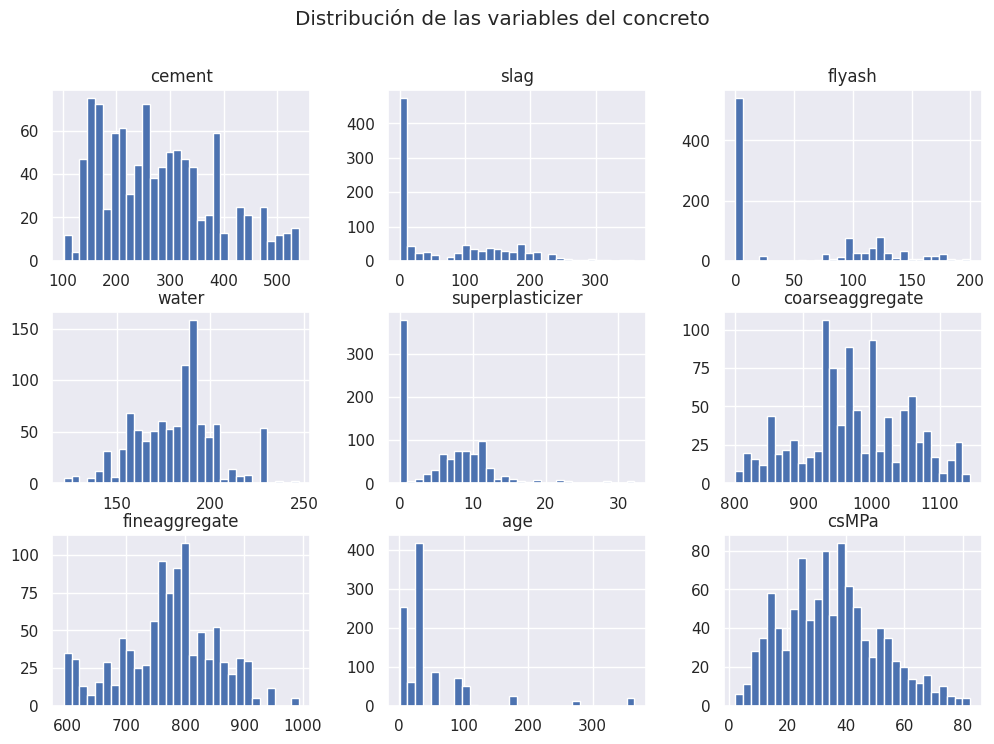

In [237]:
#Se crean los histogramas
df.hist(bins=30, figsize=(12,8))
plt.suptitle("Distribución de las variables del concreto")
plt.show()

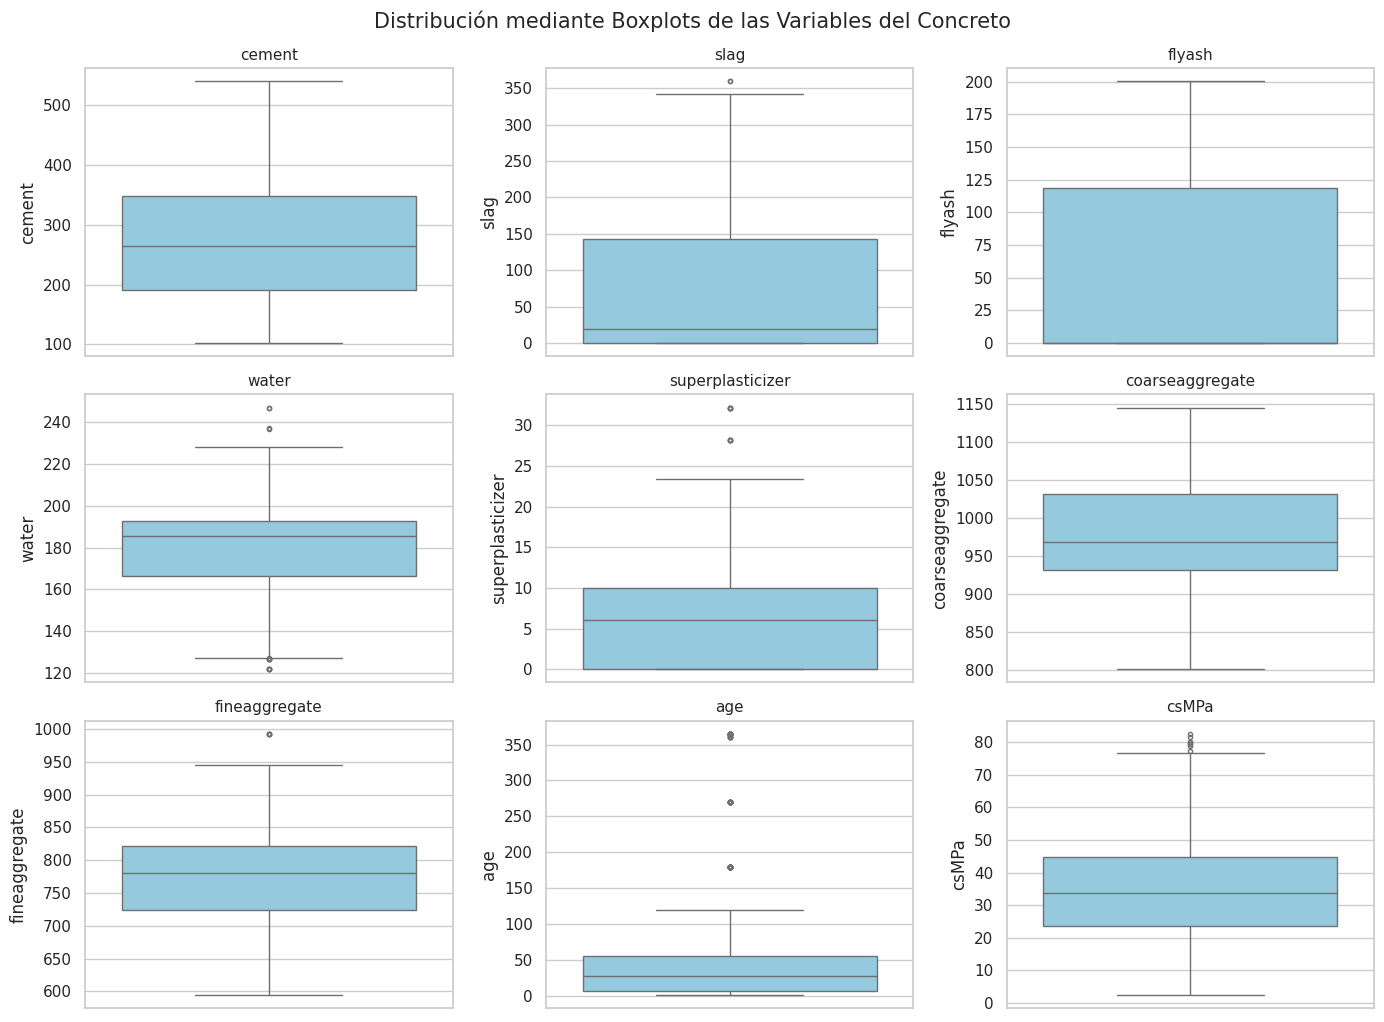

In [238]:
#Se configura el estilo gráfico
sns.set(style="whitegrid", palette="pastel")
#Se define el tamaño de la figura
plt.figure(figsize=(14, 10))
#Se seleccionan las columnas numéricas para analizar
columnas = ['cement', 'slag', 'flyash', 'water', 'superplasticizer',
            'coarseaggregate', 'fineaggregate', 'age', 'csMPa']
#Se crea un boxplot para cada columna
for i, col in enumerate(columnas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue', fliersize=3)
    plt.title(col, fontsize=11)
    plt.tight_layout()
#Se agrega el titulo general y se plotea
plt.suptitle("Distribución mediante Boxplots de las Variables del Concreto", fontsize=15, y=1.02)
plt.show()

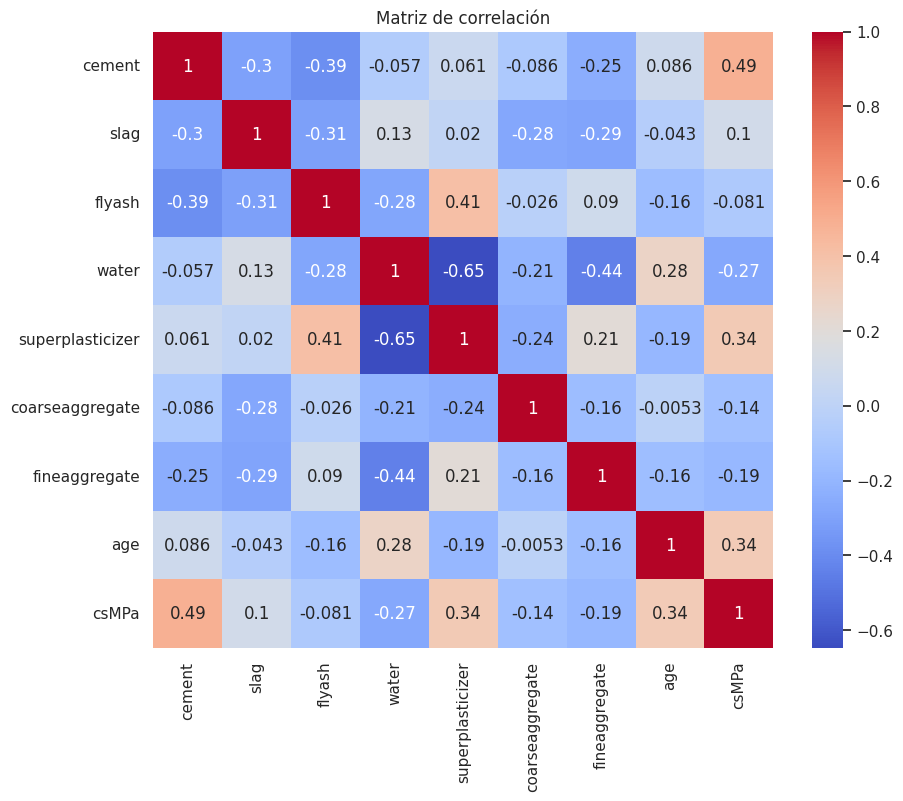

In [239]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

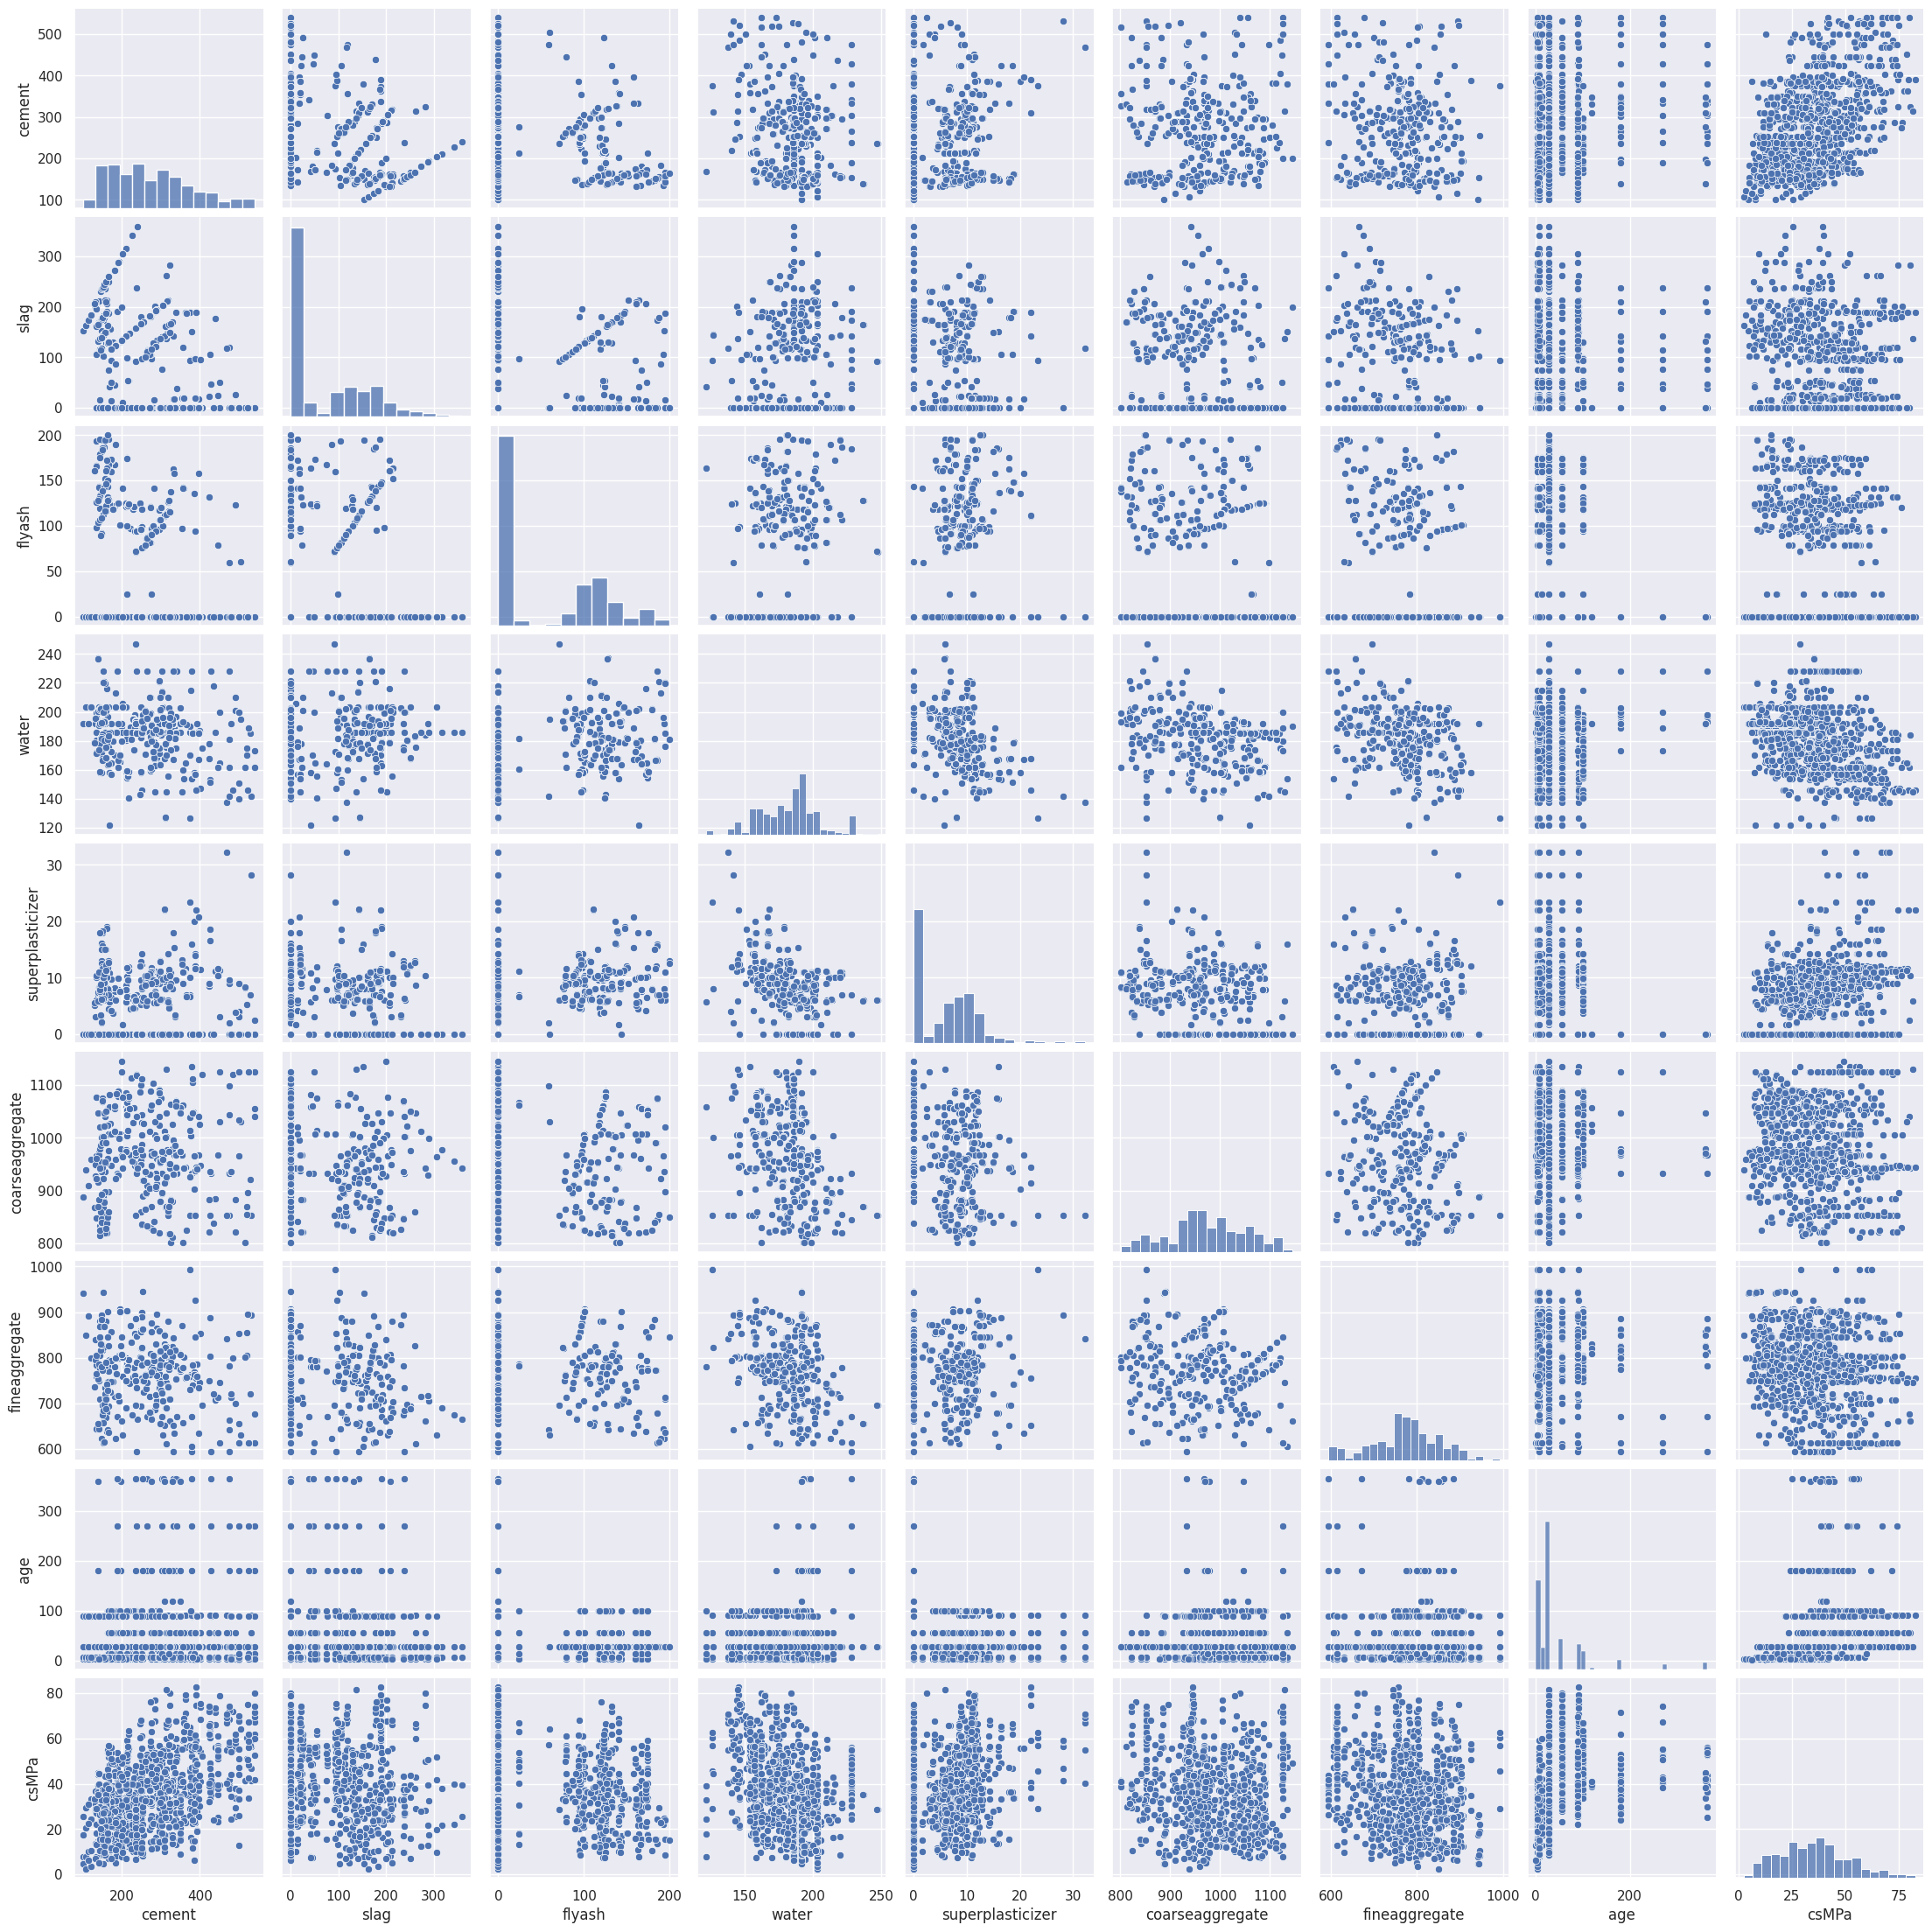

In [240]:
sns.set_theme()
sns.pairplot(df)

In [241]:
#Se creara una etiqueta para poder distinguir si el concreto es de baja, media, alta o muy alta resistencia a la compresión
def clasificar_resistencia(valor):
    if valor < 25:
        return 'Baja'
    elif valor < 50:
        return 'Media'
    elif valor < 75:
        return 'Alta'
    else:
        return 'Muy alta'

In [242]:
#Se aplica la función al dataframe
df['Categoria_Resistencia'] = df['csMPa'].apply(clasificar_resistencia)

In [243]:
#Reviso una muestra para ver si se aplico de manera adecuada el etiquetado
df.head(10)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Categoria_Resistencia
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,Muy alta
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Alta
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,Media
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,Media
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,Media
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,Media
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70,Media
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45,Media
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Media
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,Media


In [244]:
# Conteo
conteo = df['Categoria_Resistencia'].value_counts()

# Porcentaje de cada clase
porcentaje = df['Categoria_Resistencia'].value_counts(normalize=True) * 100

# Mostrar ambos
pd.DataFrame({'Conteo': conteo, 'Porcentaje (%)': porcentaje.round(2)})

,Conteo,Porcentaje (%)
Categoria_Resistencia,,
Media,518,51.54
Baja,294,29.25
Alta,182,18.11
Muy alta,11,1.09


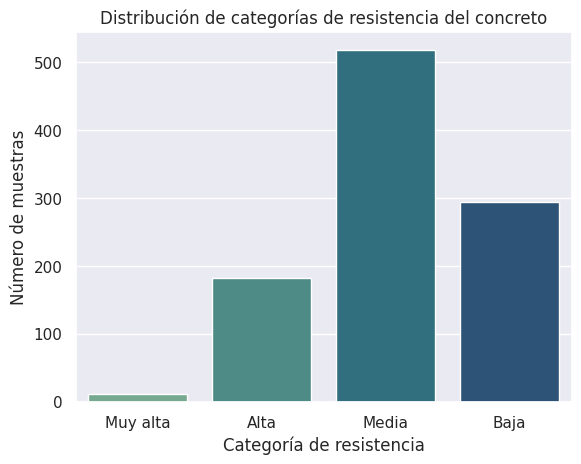

In [245]:
#Se grafica los porcentajes de las categorias
sns.countplot(x='Categoria_Resistencia', hue='Categoria_Resistencia', data=df, palette='crest', legend=False)
plt.title('Distribución de categorías de resistencia del concreto')
plt.xlabel('Categoría de resistencia')
plt.ylabel('Número de muestras')
plt.show()

Se hara el primer modelo de random forest. No se empleara técnicas de resampling para resolver el desequilibrio de clases.

In [246]:
X = df.drop('Categoria_Resistencia', axis=1)
y = df['Categoria_Resistencia']

In [247]:
X.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [248]:
scaler = StandardScaler()
scaler.fit_transform(X);

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Primer Random Forest**

In [250]:
# Instanciamos el modelo
model = RandomForestClassifier(n_estimators=100,random_state=0)

# Entrenamos el modelo
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [251]:
# Predecimos para el test set
y_pred = model.predict(X_test)

In [252]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Alta       0.92      1.00      0.96        55
        Baja       1.00      1.00      1.00        88
       Media       1.00      1.00      1.00       152
    Muy alta       1.00      0.29      0.44         7

    accuracy                           0.98       302
   macro avg       0.98      0.82      0.85       302
weighted avg       0.98      0.98      0.98       302



In [253]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 55   0   0   0]
 [  0  88   0   0]
 [  0   0 152   0]
 [  5   0   0   2]]


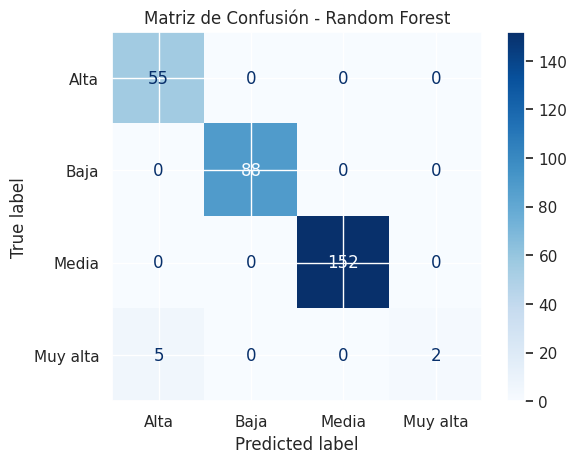

In [254]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Random Forest')
plt.show()